In [1]:
import tensorflow as tf

from tensorflow.keras import utils

### ```Holla !```

In [ ]:
orifile = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"

extract = !False

utils.get_file(origin=orifile, cache_dir="/tmp", extract=extract)

In [ ]:
base_dir = "/tmp/datasets/rockpaperscissors/rps-cv-images"

batch_size = 128; image_size = (150, 150); validation_split = 0.3; seed = 404

(train, testi) = utils.image_dataset_from_directory(
    base_dir,
    batch_size=batch_size,
    image_size=image_size,
    subset="both", seed=seed,
    validation_split=validation_split,
    interpolation="nearest"
)

output_node = len(train.class_names)

In [4]:
def relayer(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.math.divide(image, 255.0)
    return image, label

train = train.map(relayer).shuffle(100).cache()

testi = testi.map(relayer)

In [5]:
from Hantu import Modelin, Modeler

from tensorflow.keras import layers, Model

model_one = Modelin()

train = train.map(lambda i, l : (model_one(i), l))

### ```Model I```

In [ ]:
model = Modeler(output_node)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

hist = model.fit(train, epochs=8, verbose=1, validation_data=testi)

In [7]:
model.evaluate(train, verbose=0)

[0.18775109946727753, 0.9412532448768616]

In [8]:
model.evaluate(testi, verbose=0)

[0.16721293330192566, 0.9512194991111755]

In [9]:
from Histplot import Histplot

image_hist = Histplot(hist, hist_acc="accuracy")

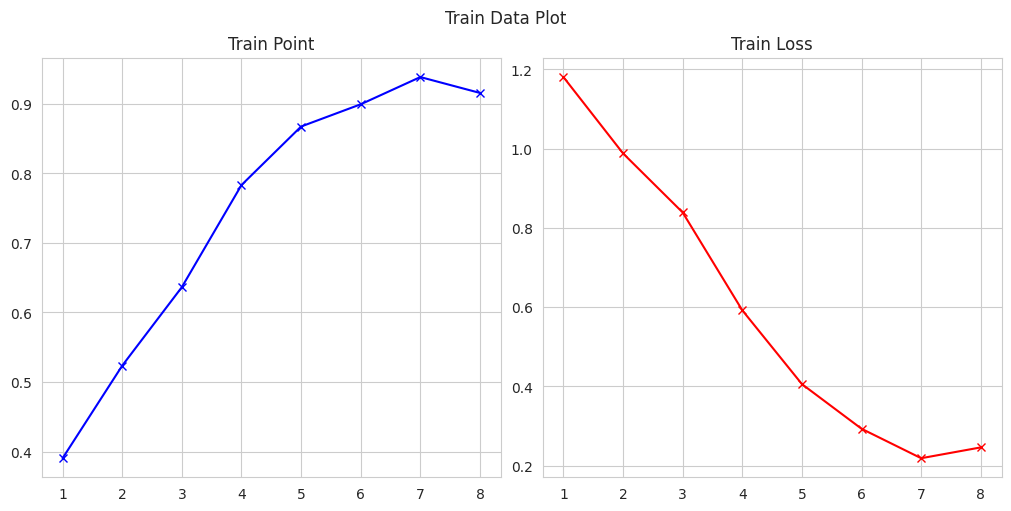

In [10]:
image_hist.Trainplot()

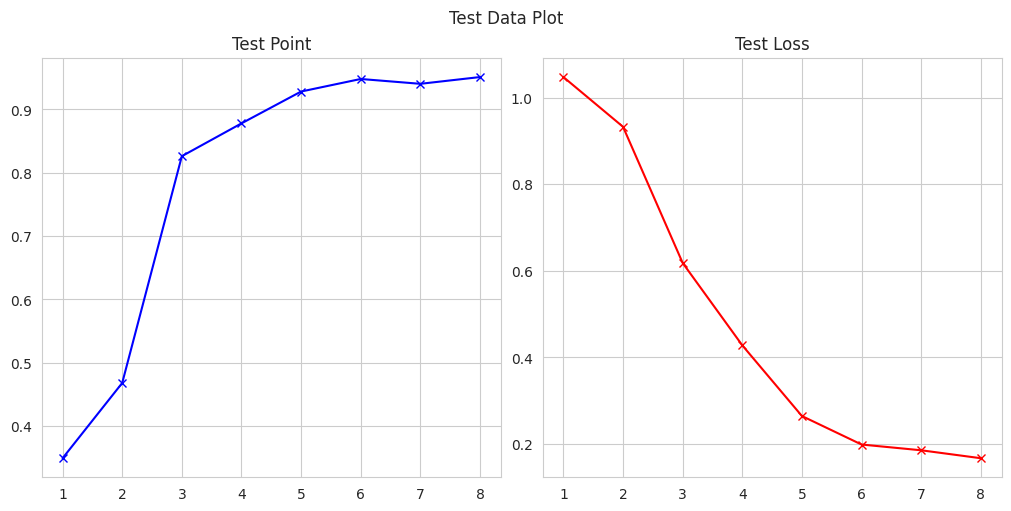

In [11]:
image_hist.Testiplot()

In [ ]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

!apt-get install tensorflow-model-server

In [13]:
import os

model_folder = "/tmp/model"

if not os.path.exists(model_folder):
  os.mkdir(model_folder)

In [14]:
model_serial = "1"

model_path = os.path.join(model_folder, model_serial)

tf.saved_model.save(model, model_path)

In [15]:
os.environ["ModelFolder"] = "/tmp/model"

In [16]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=inter_model \
  --model_base_path="${ModelFolder}"

In [17]:
!tail server.log

In [18]:
import json, requests

test_img, test_label = next(iter(testi))

test_img = test_img.numpy().tolist()

url = "http://127.0.0.1:8501/v1/models/inter_model:predict"

In [19]:
import tensorflow as tf
import json, requests

def Modeler(test_data, url, output="max"):
  data = json.dumps({"signature_name":"serving_default", "instances":test_data})
  json_resp = requests.post(url, data=data, headers={"content-type":"application/json"})
  json_load = json.loads(json_resp.text)
  result = json_load["predictions"]
  if output == "max":
    return tf.math.argmax(result, axis=1).numpy()
  elif output == "original":
    return result

output = Modeler(test_img, url, output="max")

In [20]:
output

array([2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1,
       2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0,
       1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1,
       0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1])

In [21]:
logits = Modeler(test_img, url, output="original")

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

loss_i = loss_fn(test_label, logits)

loss_i.numpy()

0.20447195

### ```Optional```

In [22]:
model.save('/tmp/modelapi',save_format='tf')

In [ ]:
!zip -r "modelapi.zip" "/tmp/modelapi"

In [24]:
model_api = tf.keras.models.load_model('/tmp/modelapi')

model_api.evaluate(train, verbose=0)

[0.17878428101539612, 0.9503916501998901]